In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
in_days = 4
lead = 4
elasticnet_file = f'results/elasticnetAR_predictions_{in_days}_{lead}.txt'
svr_file = f'results/SVR_predictions_{in_days}_{lead}.txt'

data_file = 'data/omni_1hr_clean.csv'

In [3]:
elasticnet_pred = pd.read_csv(elasticnet_file, index_col=0, parse_dates=[1]).set_index('Timestamp')
svr_pred = pd.read_csv(svr_file, index_col=0, parse_dates=[1]).set_index('Timestamp')
elasticnet_pred, svr_pred

(                               Prediction
 Timestamp                                
 2017-01-01 00:00:00   [371.4001890234904]
 2017-01-01 01:00:00   [372.1331946756273]
 2017-01-01 02:00:00   [371.3468783234157]
 2017-01-01 03:00:00  [371.20145871080445]
 2017-01-01 04:00:00   [373.3849910169768]
 ...                                   ...
 2017-12-31 19:00:00   [425.3966491803324]
 2017-12-31 20:00:00   [427.0992395174458]
 2017-12-31 21:00:00  [429.69510567219214]
 2017-12-31 22:00:00    [429.849192436841]
 2017-12-31 23:00:00   [429.8678007899713]
 
 [8760 rows x 1 columns],
                                Prediction
 Timestamp                                
 2017-01-01 00:00:00   [365.7546613195575]
 2017-01-01 01:00:00  [365.39990249141874]
 2017-01-01 02:00:00   [365.0172800429004]
 2017-01-01 03:00:00    [364.654574627952]
 2017-01-01 04:00:00  [364.50201910918776]
 ...                                   ...
 2017-12-31 19:00:00  [395.08291602532273]
 2017-12-31 20:00:00   [39

In [4]:
elasticnet_pred['V'] = elasticnet_pred['Prediction'].apply(lambda x: eval(x)[0])
svr_pred['V'] = svr_pred['Prediction'].apply(lambda x: eval(x)[0])
elasticnet_pred, svr_pred

(                               Prediction           V
 Timestamp                                            
 2017-01-01 00:00:00   [371.4001890234904]  371.400189
 2017-01-01 01:00:00   [372.1331946756273]  372.133195
 2017-01-01 02:00:00   [371.3468783234157]  371.346878
 2017-01-01 03:00:00  [371.20145871080445]  371.201459
 2017-01-01 04:00:00   [373.3849910169768]  373.384991
 ...                                   ...         ...
 2017-12-31 19:00:00   [425.3966491803324]  425.396649
 2017-12-31 20:00:00   [427.0992395174458]  427.099240
 2017-12-31 21:00:00  [429.69510567219214]  429.695106
 2017-12-31 22:00:00    [429.849192436841]  429.849192
 2017-12-31 23:00:00   [429.8678007899713]  429.867801
 
 [8760 rows x 2 columns],
                                Prediction           V
 Timestamp                                            
 2017-01-01 00:00:00   [365.7546613195575]  365.754661
 2017-01-01 01:00:00  [365.39990249141874]  365.399902
 2017-01-01 02:00:00   [365.017280042

In [5]:
observations = pd.read_csv(data_file, index_col = 0, parse_dates=[0]).interpolate(method='time')
observations

,BR,BT,BN,V,N,T
datetime,,,,,,
1996-08-01 00:00:00,1.5,-3.7,-3.3,498.0,3.3,143535.0
1996-08-01 01:00:00,5.1,-1.2,-0.7,492.0,2.7,121473.0
1996-08-01 02:00:00,3.2,-2.7,3.9,513.0,3.6,163789.0
1996-08-01 03:00:00,1.1,-2.1,-1.8,538.0,4.2,159645.0
1996-08-01 04:00:00,2.4,-3.0,1.9,539.0,4.5,199876.0
...,...,...,...,...,...,...
2021-12-31 20:00:00,-0.6,-2.0,4.2,418.0,7.8,78906.0
2021-12-31 21:00:00,-1.3,-2.4,3.4,423.0,8.6,88405.0
2021-12-31 22:00:00,1.1,-2.3,1.6,414.0,8.1,95631.0


In [6]:
shift_n_days = observations.shift(freq=f'{lead}d')
shift_n_days

,BR,BT,BN,V,N,T
datetime,,,,,,
1996-08-05 00:00:00,1.5,-3.7,-3.3,498.0,3.3,143535.0
1996-08-05 01:00:00,5.1,-1.2,-0.7,492.0,2.7,121473.0
1996-08-05 02:00:00,3.2,-2.7,3.9,513.0,3.6,163789.0
1996-08-05 03:00:00,1.1,-2.1,-1.8,538.0,4.2,159645.0
1996-08-05 04:00:00,2.4,-3.0,1.9,539.0,4.5,199876.0
...,...,...,...,...,...,...
2022-01-04 20:00:00,-0.6,-2.0,4.2,418.0,7.8,78906.0
2022-01-04 21:00:00,-1.3,-2.4,3.4,423.0,8.6,88405.0
2022-01-04 22:00:00,1.1,-2.3,1.6,414.0,8.1,95631.0


In [7]:
shift_27_days = observations.shift(freq='27d')
shift_27_days

,BR,BT,BN,V,N,T
datetime,,,,,,
1996-08-28 00:00:00,1.5,-3.7,-3.3,498.0,3.3,143535.0
1996-08-28 01:00:00,5.1,-1.2,-0.7,492.0,2.7,121473.0
1996-08-28 02:00:00,3.2,-2.7,3.9,513.0,3.6,163789.0
1996-08-28 03:00:00,1.1,-2.1,-1.8,538.0,4.2,159645.0
1996-08-28 04:00:00,2.4,-3.0,1.9,539.0,4.5,199876.0
...,...,...,...,...,...,...
2022-01-27 20:00:00,-0.6,-2.0,4.2,418.0,7.8,78906.0
2022-01-27 21:00:00,-1.3,-2.4,3.4,423.0,8.6,88405.0
2022-01-27 22:00:00,1.1,-2.3,1.6,414.0,8.1,95631.0


In [8]:
plottable = observations.join(shift_n_days, 
                 rsuffix=f'_{lead}d').join(shift_27_days,
                                          rsuffix='_27d').join(elasticnet_pred, 
                  rsuffix='_elasticnet').dropna()[['V',
                                                                        f'V_{lead}d',
                                                                        'V_27d',
                                                                        'V_elasticnet']]

(array([17443., 17444., 17445., 17446., 17447., 17448., 17449., 17450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

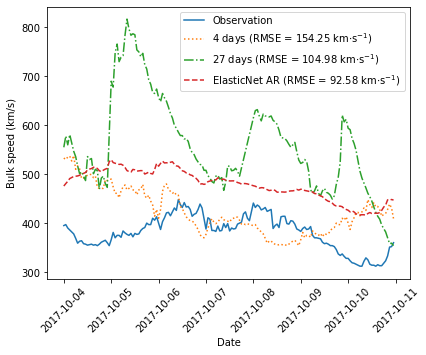

In [9]:
plottable = plottable.loc['2017-10-04':'2017-10-10']

plt.figure(figsize=(6.5, 5))
idx = plottable.index
styles = ['-', ':', '-.', '--', '--']
markers = ['*', '^', 'x', '.']

xlabel = 'Date'
legend = ['Observation', '4 days (RMSE = $154.25$ km$\cdot$s$^{-1}$)', 
          '27 days (RMSE = $104.98$ km$\cdot$s$^{-1}$)', 
          'ElasticNet AR (RMSE = $92.58$ km$\cdot$s$^{-1}$)', 'SVR']

for i in range(len(plottable.columns)):
    if i > 3:
        plt.plot(idx, plottable[plottable.columns[i]], linestyle=styles[i],
                marker=markers[i-2])
    else:
        plt.plot(idx, plottable[plottable.columns[i]], linestyle=styles[i])

plt.xlabel(xlabel)
plt.ylabel('Bulk speed (km/s)')
plt.legend(legend)
plt.xticks(rotation=45)

# plottable.loc['2017-10-01':'2017-10-31'].plot(figsize=(5, 5), style=['-',
#                                       ':',
#                                       '-.',
#                                       '--',
#                                       '--'],
#                                     xlabel='Date',
#                                              marker='.');